In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, Birch
from sklearn.metrics.cluster import homogeneity_score
import matplotlib.pyplot as plt

In [3]:
url = "./online_shoppers_intention.csv"
data_raw = pd.read_csv(url)

data = data_raw

categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for column in categorical_columns:
  data[column] = data[column].astype('category')

In [4]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
data.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                        bool
Revenue                        bool
dtype: object

In [6]:
visitor_type_dummies = pd.get_dummies(data['VisitorType'])
traffic_type_dummies = pd.get_dummies(data['TrafficType'], prefix='TrafficType')

region_dummies = pd.get_dummies(data['Region'], prefix='Region')
month_dummies = pd.get_dummies(data['Month'])

data_final = pd.concat((data, visitor_type_dummies, traffic_type_dummies, region_dummies, month_dummies), axis=1)
data_final = data_final.drop(['VisitorType', 'TrafficType', 'Region', 'Month', 'Weekend', 'OperatingSystems', 'Browser', 'ExitRates', 'ProductRelated_Duration'], axis=1)
data_final['Revenue'] = data_final['Revenue'].astype(int)

In [7]:
data_final.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
BounceRates                float64
PageValues                 float64
SpecialDay                 float64
Revenue                      int64
New_Visitor                  uint8
Other                        uint8
Returning_Visitor            uint8
TrafficType_1                uint8
TrafficType_2                uint8
TrafficType_3                uint8
TrafficType_4                uint8
TrafficType_5                uint8
TrafficType_6                uint8
TrafficType_7                uint8
TrafficType_8                uint8
TrafficType_9                uint8
TrafficType_10               uint8
TrafficType_11               uint8
TrafficType_12               uint8
TrafficType_13               uint8
TrafficType_14               uint8
TrafficType_15               uint8
TrafficType_16               uint8
TrafficType_17      

In [8]:
for column in ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay']:
    data_final[column] = (data_final[column] - data_final[column].mean())/data_final[column].std()

In [9]:
data_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Revenue,New_Visitor,Other,Returning_Visitor,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,3.667040,-0.317165,-0.308809,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.457664,-0.317165,-0.308809,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,3.667040,-0.317165,-0.308809,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,0.573512,-0.317165,-0.308809,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.045194,-0.317165,-0.308809,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

X = data_final.drop(['Revenue'], axis=1)
y = data_final['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# DBSCAN

In [63]:
eps = [0.5, 1, 3]
min_samples = [20]

best_eps = 0
best_min_sample = 0
best_score = 0

for eps_ in eps:
    for min_sample in min_samples:
        clustering = DBSCAN(eps=eps_, min_samples=min_sample).fit(X)
        y_pred = clustering.labels_
        score_ = homogeneity_score(y, y_pred)
        if(score_ > best_score):
            best_eps = eps_
            best_min_sample = min_sample
            best_score = score_

print("Best homogeneity score: ", best_score)

Best homogeneity score:  0.04086782942373848


In [64]:
print("Best parameters: ", best_eps, best_min_sample)

Best parameters:  1 20


In [65]:
 clustering = DBSCAN(eps=1, min_samples=20).fit(X)
y_pred = clustering.labels_
print("Homogeneity score: ", homogeneity_score(y, y_pred))

Homogeneity score:  0.04086782942373848


In [66]:
print("Unique clustering labels len", len(np.unique(y_pred)))

Unique clustering labels len 60


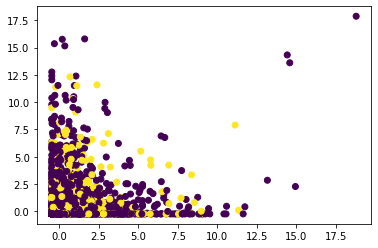

In [68]:
sc = plt.scatter(X['Administrative_Duration'], X['Informational_Duration'], cmap="hsv")
sc.set_array(y)

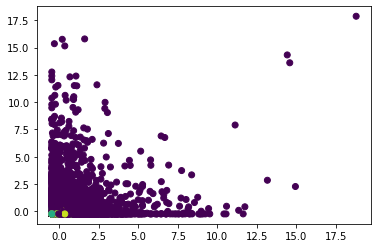

In [69]:
sc = plt.scatter(X['Administrative_Duration'], X['Informational_Duration'], cmap="hsv")
sc.set_array(y_pred)

# KMeans

In [51]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y_pred = kmeans.labels_
print("Homogeneity score: ", homogeneity_score(y, y_pred))

Homogeneity score:  0.01776448479946827


In [52]:
print("Unique clustering labels", np.unique(y_pred))

Unique clustering labels [0 1]


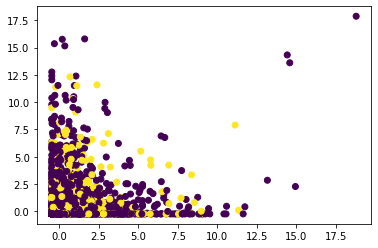

In [53]:
sc = plt.scatter(X['Administrative_Duration'], X['Informational_Duration'], cmap="hsv")
sc.set_array(y)

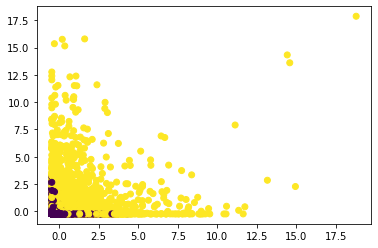

In [54]:
sc = plt.scatter(X['Administrative_Duration'], X['Informational_Duration'], cmap="hsv")
sc.set_array(y_pred)

# Birch Clustering

In [55]:
clustering = Birch(n_clusters=2).fit(X)
y_pred = clustering.labels_
print("Homogeneity score: ", homogeneity_score(y, y_pred))

Homogeneity score:  0.005913274564991151


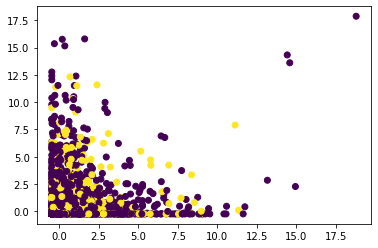

In [56]:
sc = plt.scatter(X['Administrative_Duration'], X['Informational_Duration'], cmap="hsv")
sc.set_array(y)

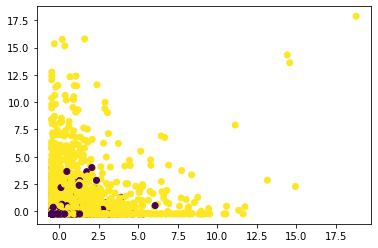

In [57]:
sc = plt.scatter(X['Administrative_Duration'], X['Informational_Duration'], cmap="hsv")
sc.set_array(y_pred)

# Выводы


*   Методы KMeans показал наилучший результат с точностью 0.018 для 2 кластеров.
*   DBSCAN показал неплохую точность 0.883, однако разбил данные на 7620 кластеров.

